## **MNIST**

Sprawdzanie jaka cyfra znajduje się na obrazku za pomocą sieci konwolucyjnych.

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical # żeby odpowiednio przekształcić y_train

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Mamy 6000 zdjec o rozmiarze 28x28 pikseli itd

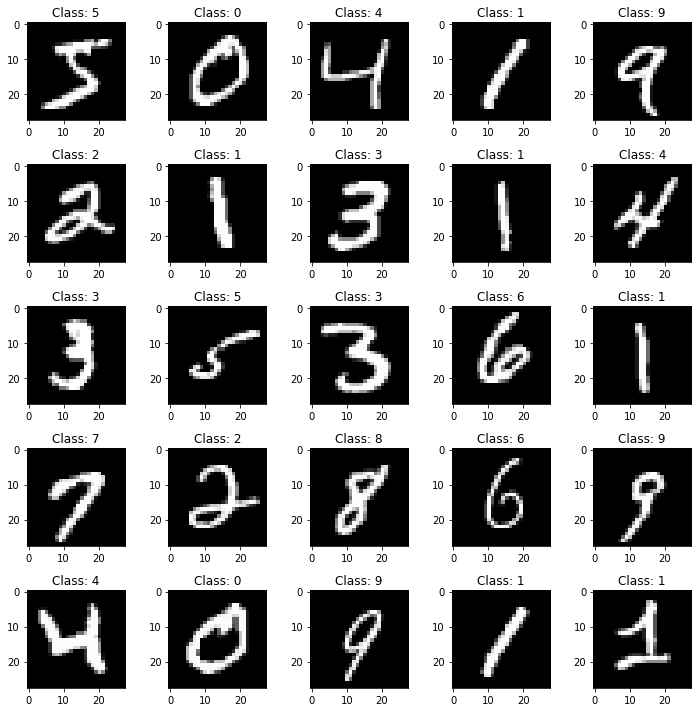

In [11]:
plt.figure(figsize=(10,10))

for idx in range(25):
  plt.subplot(5,5, idx+1)
  plt.imshow(X_train[idx], cmap='gray')
  plt.title('Class: {}'.format(y_train[idx]))

plt.tight_layout()

In [12]:
X_train.shape # Trzeba dodać ilość kanałów i znormalizować wartości od 0 do 1

(60000, 28, 28)

In [13]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(-1, img_rows, img_cols, 1 ) # -1 żeby biblioteka wyliczyła
X_test = X_test.reshape(-1, img_rows, img_cols, 1 )

input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
if np.max(X_train) > 1: X_train = X_train / 255 # normalizujemy 0-1
if np.max(X_test) > 1: X_test = X_test / 255 # normalizujemy 0-1

In [16]:
X_train.max(), X_test.max()

(1.0, 1.0)

In [0]:
# Musimy przekształcić y_train do postaci : 5 => [0,0,0,0,1,0,0,0,0]  , żeby prognozować prawdopodobieństwa dla wszystkich możliwych klas
                                          # 0 => [1,0,0,0,0,0,0,0,0]

In [0]:
if len(y_train.shape) == 1:
  num_classes = len(set(y_train)) # sprawdzamy ile mamy unikalnych wartości i to nasza liczba klas
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)

In [20]:
y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [24]:
# BUDUJEMY MODEL
model = Sequential([
        Conv2D( filters=32, kernel_size=(3,3), input_shape=input_shape),  # input_shape potrzebujemy tylko raz
        MaxPool2D(pool_size=(2,2)),

        Conv2D( filters=64, kernel_size=(3,3)),
        MaxPool2D(pool_size=(2,2)),

        Flatten(), # "most" umożliwiający przejście z jednej warstwy do drugiej

        Dense(512, activation='relu'), # 512 - liczba neuronów, activation - funkcja aktywacji

        Dense(num_classes, activation='softmax') # ostatnia warstwa musi zawierać liczbe klas
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## TRENOWANIE

In [26]:
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=3, # ilość epok, czyli ile razy będzie iterować sieć
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/3





60000/60000 [==============================] - 57s 956us/step - loss: 0.1637 - acc: 0.9512 - val_loss: 0.0499 - val_acc: 0.9849
Epoch 2/3
60000/60000 [==============================] - 56s 938us/step - loss: 0.0435 - acc: 0.9868 - val_loss: 0.0447 - val_acc: 0.9852
Epoch 3/3
60000/60000 [==============================] - 56s 930us/step - loss: 0.0276 - acc: 0.9915 - val_loss: 0.0378 - val_acc: 0.9879


val_acc oznacza, że model w 98% przypadków dobrze prognozuje

## TESTOWANIE

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

In [28]:
score 

[0.03782103468640999, 0.9879]

In [0]:
!git config --global user.email "asiastrug1997@vp.pl"
!git config --global user.name "Joanna"